In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv(r"C:\Users\HP-PC\Desktop\Python data analytics\train data set 1.csv",usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.dropna(inplace=True)

In [11]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [17]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.6303599374021909

In [21]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [22]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [23]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [24]:
trf.named_transformers_['first'].n_bins_

array([10])

In [25]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [26]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [27]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [30]:
output['age_labels'] = pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [32]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
233,5.0,0.0,31.3875,7.0,"(0.42, 14.0]","(29.125, 51.479]"
871,47.0,8.0,52.5542,8.0,"(42.0, 50.0]","(51.479, 82.171]"
325,36.0,7.0,135.6333,9.0,"(32.0, 36.0]","(82.171, 512.329]"
638,41.0,7.0,39.6875,7.0,"(36.0, 42.0]","(29.125, 51.479]"
521,22.0,3.0,7.8958,2.0,"(19.0, 22.0]","(7.75, 7.896]"


In [33]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [34]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [36]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.6274647887323943

In [38]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode = 'ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins,encode = 'ordinal',strategy=strategy)
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")
    plt.show()

0.6247261345852895


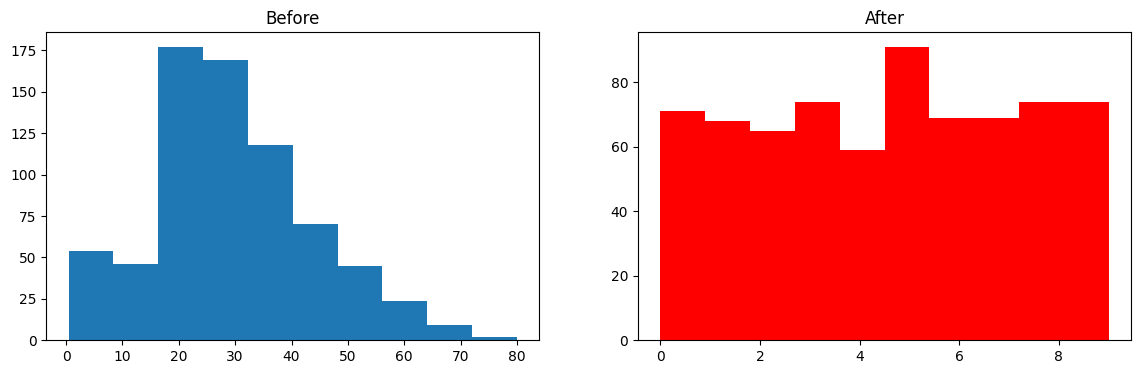

In [39]:
discretize(10,'quantile')